In [1]:
import cv2

In [2]:
img = cv2.imread('C:/Users/chotu/Downloads/download.jpg')

In [3]:
img.shape

(168, 300, 3)

In [4]:
img[0]

array([[160, 141, 128],
       [162, 143, 130],
       [166, 147, 134],
       [171, 152, 139],
       [176, 157, 144],
       [181, 162, 149],
       [187, 165, 153],
       [189, 167, 155],
       [192, 168, 156],
       [193, 169, 157],
       [197, 173, 161],
       [201, 177, 165],
       [207, 181, 169],
       [211, 185, 173],
       [215, 189, 177],
       [216, 190, 178],
       [224, 192, 186],
       [225, 193, 187],
       [227, 195, 189],
       [229, 197, 191],
       [232, 200, 194],
       [234, 202, 196],
       [236, 204, 198],
       [237, 205, 199],
       [235, 203, 197],
       [235, 203, 197],
       [235, 203, 197],
       [235, 203, 197],
       [235, 203, 197],
       [235, 203, 197],
       [235, 203, 197],
       [235, 203, 197],
       [229, 199, 194],
       [229, 199, 194],
       [229, 199, 194],
       [228, 198, 193],
       [227, 197, 192],
       [226, 196, 191],
       [225, 196, 192],
       [224, 195, 191],
       [220, 192, 191],
       [219, 191

In [5]:
import matplotlib.pyplot as plt

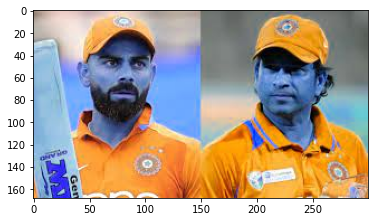

In [6]:
plt.imshow(img)

27--Ascii value of ESCAPE.
My window terminate only if i press ESC.
First we started a while loop then using cv2.waitKey.

Now what cv2.waitKey is doing. It is mentioned in the below image where 2 is the time in milliseconds and 27 is ASCII number of escape key. So it means if you press escape then loop is going to break and in last line it will destroy or close all the windows that are opened by OpenCV.


In [7]:
while True:
  cv2.imshow('result',img)
  if cv2.waitKey(2) == 27:
    break
cv2.destroyAllWindows()

FOR FACE Detection famous algo is viola jones algorithmn

Haar Features Selection
Integral Images
AdaBoost
Cascading Classifier
We do not have to worry about these steps right now because we already have a XML file which is going to help us to detect faces from the image.


In [8]:
face_cascade = cv2.CascadeClassifier("C:\\Users\\chotu\\Downloads\\opencv-master\\opencv-master\\data\\haarcascades\\haarcascade_frontalface_default.xml")

In [9]:
face_cascade.detectMultiScale(img)

array([[ 49,  21,  68,  68],
       [192,  30,  61,  61]])

In [10]:
while True:
    faces=face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

So Now  people wearing mask or not i need data so  i will  collect data from myself to do this.

In [11]:
#start camera--(0) for default and (1)n for another machine
capture = cv2.VideoCapture(0)
while True:
    flag,img = capture.read() #flag =True if camera working otherwise it will return false
    if flag:
        faces=face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27:
        break
capture.release()
cv2.destroyAllWindows()

Collect the data wearing a mask or not wearing a mask
1.We have to  slice the face


In [12]:
import numpy as np

In [15]:
 #Collecting image without mask
capture = cv2.VideoCapture(0)
data = []
while True:
    flag,img = capture.read() #flag =True if camera working otherwise it will return false
    if flag:
        faces=face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face,(250,250))
        print(len(data))
        if len(data)<400:
            data.append(face)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27 or len(data)>=200:
        break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


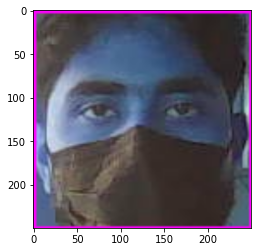

In [20]:
plt.imshow(data[0])

In [18]:
np.save('Without-mask.npy',data)

In [19]:
 #Collecting image with mask
capture = cv2.VideoCapture(0)
data = []
while True:
    flag,img = capture.read() #flag =True if camera working otherwise it will return false
    if flag:
        faces=face_cascade.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
        face = img[y:y+h, x:x+w, :]
        face = cv2.resize(face,(250,250))
        print(len(data))
        if len(data)<400:
            data.append(face)
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27 or len(data)>=200:
        break
capture.release()
cv2.destroyAllWindows()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [23]:
np.save('with_mask.npy',data)

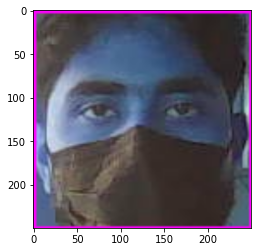

In [24]:
plt.imshow(data[0])